## Machine Learning Tutorial 2: Linear Regression Single Variable 

In this tutorial we will predict home prices using linear regression. We use training data that has home areas in square feet and corresponding prices and train a linear regression model using `sklearn.linear_model.LinearRegression` class. Later we proceed to use the `predict` method on the linear regression object to make a prediction.  

### Predicting home prices using linear regression

Below we have the set of home prices in Monroe TWP, NJ (USA):

<img src="img/home-prices.png" alt="Home Prices" width="200"/>

Given these home prices, find a way to determine **prices** of homes whose **area** is, 

* **3300 square feet**; and
* **5000 square feet**

# price = m * area + c
* `price` = dependent variable
* `area` = independent variable



Using given prices and area, we can plot a **scatter plot** where these red markers show the available data points.

On top of this scatter plot, we can proceed to draw a **line of best fit** which best represents these data points.

Using this line (model), we can now determine the price of any home given its area: 

<img src="img/best-fit-linreg.png" alt="Best Fit" width="400"/>

**But how did we come up with this particular line?**


## Linear Regression

We use **linear regression** to calculate the line by **minimizing the delta** between **actual data** points and the **predicted values**. This line best represents the relationship between area and price based on the available data. 

<img src="img/minimize-error.png" alt="Minimize Error" width="200"/>

The most important library we are using is `sklearn` which is short for **scikit-learn**.

In this tutorial we will use one of their selection of models called `sklearn.linear_model` 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("C:\\Users\\Vaishob\\PycharmProjects\\machine-learning\\homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In machine learning, we deal a lot with **Pandas** and **Dataframes** - therefore it is crucial to be familliar with Pandas and data manipulation using various datasets beforehand! 

Now that we have a Dataframe, we will go ahead and plot a **scatter plot** to understand the distribution of my data points.

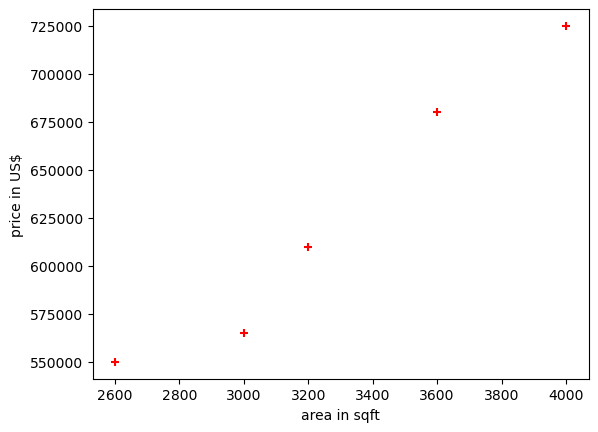

In [4]:
# Magic command to display Matplotlib plots directly below cell within your notebook
%matplotlib inline

# Set label for x-axis of the plot
plt.xlabel('area in sqft')

# Set label for y-axis of the plot
plt.ylabel('price in US$')

# Create scatter plot, using `area` and `price` fields for x and y values respectively
plt.scatter(df.area,df.price,color='red',marker='+')

From the above plot, we observe that the distribution is **suitable for linear regression model**. Hence, we will proceed to use the `LinearRegression` model 

In [5]:
# Create a LinearRegression object
reg = linear_model.LinearRegression()

# Train the linear regression model
reg.fit(df[['area']],df.price)

LinearRegression()

`df[['area']]` is a DataFrame containing one column, 'area', from the original DataFrame df. Even though it's a single column, using double brackets ([['area']]) ensures that it remains a DataFrame.

This is important as scikit-learn expects the **independent variable** (feature matrix) to be a **2D array-like structure**, which a DataFrame satisfies 

In [6]:
# Model now ready to make predictions
reg.predict([[3300]])

C:\Users\Vaishob\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

The argument `[[3300]]` is a 2D list (or array-like structure) with a single value, 3300

The outer list makes it a 2D structure, which is required by scikit-learn's `predict()` method for making predictions.

The return value, `array([628715.75342466])`, is a numpy array with the predicted value

In [7]:
# Independent Variable (`m`)
reg.coef_

array([135.78767123])

In [8]:
# Constant (`c`)
reg.intercept_ 

180616.43835616432

In [9]:
# y = m*x +c
135.78767123*3300+180616.43835616432

628715.7534151643

In [10]:
# Prediction for second house  
reg.predict([[5000]])

C:\Users\Vaishob\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [11]:
# y = m*x +c
135.78767123*5000+180616.43835616432

859554.7945061643

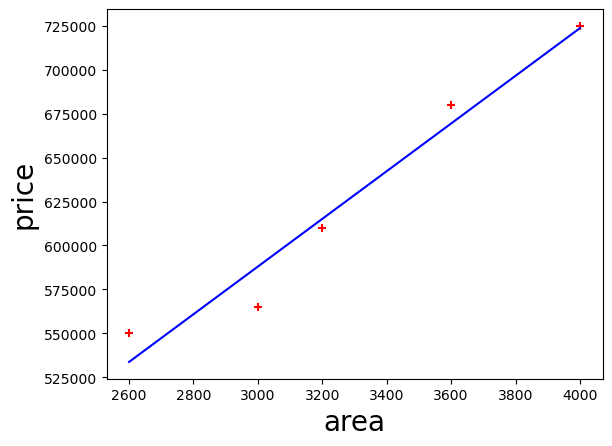

In [12]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area,df.price,color='red',marker='+')

# Adding a line plot to the figure using model predictions
plt.plot(df.area,reg.predict(df[['area']]),color='blue')

In [13]:
# Here we read a complete csv file of houses with their areas
# We are to predict the prices for each and every house in the list
d = pd.read_csv("C:\\Users\\Vaishob\\PycharmProjects\\machine-learning\\areas.csv")
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [14]:
# Here the prediction only works if the DataFrame `d` contains a single column 
reg.predict(d)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [15]:
# Store predicted prices in a numpy array
p = reg.predict(d)

In [16]:
# Create a new column and assign p to it
d['prices'] = p

In [17]:
# Display resultant DataFrame with predicted prices
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [18]:
# Convert DataFrame `d` into a CSV file and save it
d.to_csv("C:\\Users\\Vaishob\\PycharmProjects\\machine-learning\\prediction.csv",index=False)

## Exercise

Given the adjusted net national income per capita of Canada, predict the net income in year **2020**

In [19]:
# Load the Income Data
df_can = pd.read_csv("C:\\Users\\Vaishob\\PycharmProjects\\machine-learning\\canada_per_capita_income.csv")
df_can.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


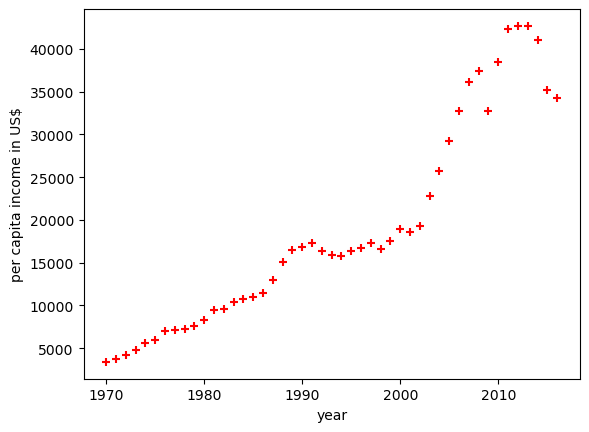

In [20]:
# Plot the Data
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income in US$')
plt.scatter(df_can.year,df_can["per capita income (US$)"],color='red',marker='+')
# plt.plot(df.area,reg.predict(area),color='blue')

In [21]:
# Create and train Linear Regression model
reg = linear_model.LinearRegression()
reg.fit(df_can[['year']],df_can["per capita income (US$)"])

LinearRegression()

In [22]:
# Predict the Per Capita Income for 2020
reg.predict([[2020]])

C:\Users\Vaishob\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])